### Loading Important Packges

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'darkgrid')
import warnings
import pprint
warnings.filterwarnings('ignore')
from sklearn import tree
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

### Loading The Train and Test Datasets

In [2]:
train = pd.read_csv('F://PGD-Data Science//Analytics_Vidhya_Hackathons//ML Starter Program Hackathon//train.csv')
test = pd.read_csv('F://PGD-Data Science//Analytics_Vidhya_Hackathons//ML Starter Program Hackathon//test.csv')

In [3]:
train1 = train.copy()
test1 = test.copy()

In [4]:
train1.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [5]:
test1.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


## Data Dictionary 
The variables can be divided into 3 categories:
    
### 1) Information Of The Programs

<b>program_id</b> - Program ID

<b>program_type</b> - Type Of Program

<b>program_duration</b> - Program Duration In Days 


### 2) Test nformation

<b>test_id</b> - Test ID

<b>test_type</b> - Test Type(online/offline)

<b>difficulty_level</b> - Difficulty Level Of Test


### 3) Trainee Demographic Information

<b>trainee_id</b> - Trainee ID

<b>gender</b> - Trainee Gender

<b>education</b> - Trainee Education Level

<b>city_tier</b> - Tier Of Trainee Residence City

<b>age</b> - Trainee Age

<b>total_programs_enrolled</b> - Total Programs Enrolled By Trainee

<b>is_handicapped</b> - Trainee Disabled Or Not

<b>trainee_engagement_rating</b> - Rating by Trainer to the trainee


### 4) Target Variable

<b>is_passed</b> - Trainee Passed or Failed(1 - Pass, 0 - Fail) 

## Understanding Data

### Checking datatypes of the variables present in the train dataset

In [6]:
train1.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [7]:
train1.shape

(73147, 16)

In [8]:
test1.shape

(31349, 15)

### Target Variable Exploration - is_pass

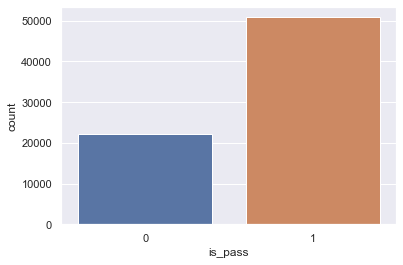

In [9]:
sns.countplot(x='is_pass', data = train1)

### Exploratory Data Analysis(EDA) - train1 and test1 datasets

In [10]:
train1['is_pass'].value_counts(normalize = True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

From target variable it's clear that this is a binary classification problem, where approximately 70% of the trainees pass the trainee test and 30% of the trainees fail the test.

In [11]:
train1.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,73147,73147,3551_25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,73147,22,Y_1,6687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_type,73147,7,Y,22560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_duration,73147,NaN,NaN,NaN,128.209,6.88968,117,121,131,134,136
test_id,73147,NaN,NaN,NaN,91.0793,51.239,0,45,90,135,187
test_type,73147,2,offline,43543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
difficulty_level,73147,4,easy,40101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trainee_id,73147,NaN,NaN,NaN,9843.08,5703.56,1,5040,9641,14552,20098
gender,73147,2,M,39043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,73147,5,High School Diploma,34371,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [13]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31349 non-null  object 
 1   program_id                 31349 non-null  object 
 2   program_type               31349 non-null  object 
 3   program_duration           31349 non-null  int64  
 4   test_id                    31349 non-null  int64  
 5   test_type                  31349 non-null  object 
 6   difficulty_level           31349 non-null  object 
 7   trainee_id                 31349 non-null  int64  
 8   gender                     31349 non-null  object 
 9   education                  31349 non-null  object 
 10  city_tier                  31349 non-null  int64  
 11  age                        19558 non-null  float64
 12  total_programs_enrolled    31349 non-null  int64  
 13  is_handicapped             31349 non-null  obj

### Null Value Check - Let's check for null values in the train and test datasets

In [14]:
train1.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [15]:
test1.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

### Heatmap Representation Of null values of train and test datasets

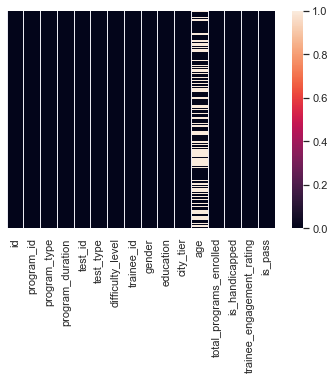

In [16]:
sns.heatmap(train1.isnull(), yticklabels = False) 

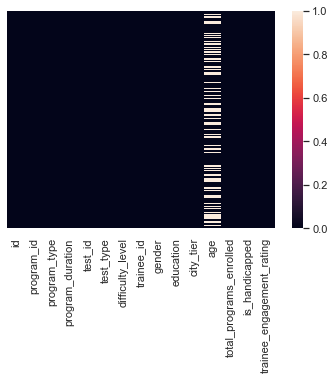

In [17]:
sns.heatmap(test1.isnull(), yticklabels = False)

### Unique values in each column 

We shall first check unique values of each column of the train dataset before categorizing the variables into numerical, categorical and ordinal variables 

In [18]:
col_uni_val = {}
for i in train1.columns:
    col_uni_val[i] = len(train1[i].unique())

pprint.pprint(col_uni_val)

{'age': 46,
 'city_tier': 4,
 'difficulty_level': 4,
 'education': 5,
 'gender': 2,
 'id': 73147,
 'is_handicapped': 2,
 'is_pass': 2,
 'program_duration': 10,
 'program_id': 22,
 'program_type': 7,
 'test_id': 188,
 'test_type': 2,
 'total_programs_enrolled': 13,
 'trainee_engagement_rating': 6,
 'trainee_id': 18500}


Considering the above unique values of each column, we categorize the columns into numerical, categorical and ordinal variables as follows. 

<b>Independent Numerical Variables</b> - id, program_id, test_id, trainee_id, age

<b>Independent Categorical Variables</b> - test_type, difficulty_level, gender, education, city_tier, is_handicapped       

<b>Independent Ordinal Variables</b> - program_type, program_duration, total_programs_enrolled, trainee_engagement_rating

### Numerical Variables

In [19]:
numerical = ['id', 'program_id', 'test_id', 'trainee_id', 'age']

In [20]:
train1[numerical].describe(include = 'all')

,id,program_id,test_id,trainee_id,age
count,73147,73147,73147.000000,73147.000000,45418.000000
unique,73147,22,NaN,NaN,NaN
top,3551_25,Y_1,NaN,NaN,NaN
freq,1,6687,NaN,NaN,NaN
mean,NaN,NaN,91.079306,9843.079620,36.494033
std,NaN,NaN,51.239048,5703.556093,9.041119
min,NaN,NaN,0.000000,1.000000,17.000000
25%,NaN,NaN,45.000000,5040.000000,28.000000
50%,NaN,NaN,90.000000,9641.000000,39.000000
75%,NaN,NaN,135.000000,14552.000000,45.000000


* The average age of a trainee enrolling in a program is 36 years, where min age - 17 yrs and max age - 63 yrs.

### Univariate Analysis 

### Variable - age

* Plotting the distribution and box plots of age variable.

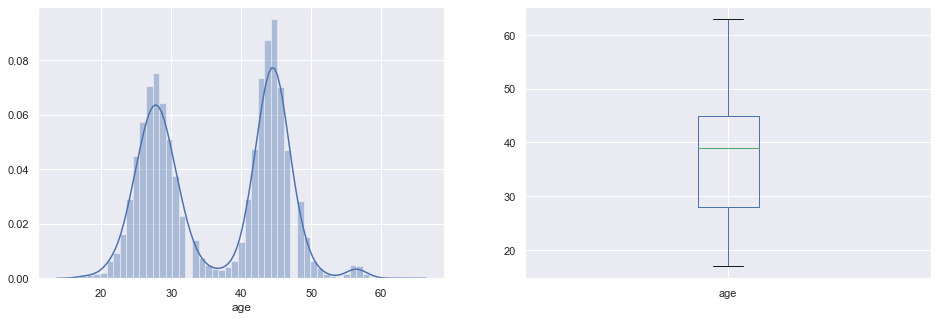

In [21]:
plt.subplot(1,2,1)
train_nonull = train1.dropna()
sns.distplot(train_nonull['age'])
plt.subplot(1,2,2)
train_nonull['age'].plot.box(figsize = (16, 5))
plt.show()

* The above distribution doesn't provide any meaningful insights. Despite of trying the np.log and stats.boxcox   transformations, there is not much change in the distribution. Let's look at the barplot distribution of age variable with the target variable <b>is_pass</b>.

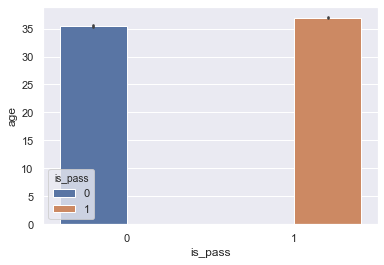

In [22]:
sns.barplot(x = 'is_pass', y = 'age', hue = 'is_pass', data = train1)

* From the above barplot, we can see that more number of people have passed the trainee test. Also, there are missing values in the age variable as seen above. We shall see how we can deal with the missing values in age variable later.

### Categorical Variables

In [23]:
categorical = ["test_type", "difficulty_level", "gender", "education", "city_tier", "is_handicapped"]

In [24]:
train1[categorical].describe(include = 'all')

,test_type,difficulty_level,gender,education,city_tier,is_handicapped
count,73147,73147,73147,73147,73147.000000,73147
unique,2,4,2,5,NaN,2
top,offline,easy,M,High School Diploma,NaN,N
freq,43543,40101,39043,34371,NaN,66577
mean,NaN,NaN,NaN,NaN,2.246845,NaN
std,NaN,NaN,NaN,NaN,1.011587,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,NaN,NaN,3.000000,NaN


### Data Visualization Of Categorical Variables

### Univariate Analysis

### Variable - test_type

In [25]:
train1['test_type'].value_counts()

offline    43543
online     29604
Name: test_type, dtype: int64

In [26]:
train1['test_type'].value_counts(normalize = True)

offline    0.595281
online     0.404719
Name: test_type, dtype: float64

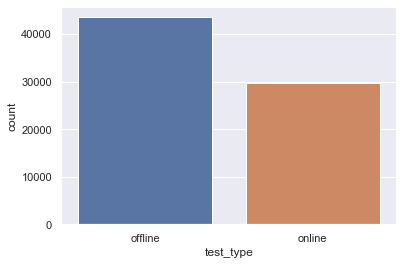

In [27]:
sns.countplot(x = 'test_type', data = train1)

* From the above countplot it's evident that, most trainees prefer offline test over online test type.

### Variable - difficulty_level

In [28]:
train1['difficulty_level'].value_counts()

easy            40101
intermediate    20668
hard            10297
vary hard        2081
Name: difficulty_level, dtype: int64

In [29]:
train1['difficulty_level'].value_counts(normalize = True)

easy            0.548225
intermediate    0.282554
hard            0.140771
vary hard       0.028450
Name: difficulty_level, dtype: float64

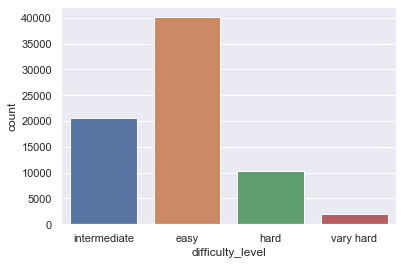

In [30]:
sns.countplot(x = 'difficulty_level', data = train1)

* From above countplot it's evident that, most of the tests conducted were easy and the lowest number of tests that were conducted were vary hard.

### Variable - gender

In [31]:
train1['gender'].value_counts()

M    39043
F    34104
Name: gender, dtype: int64

In [32]:
train1['gender'].value_counts(normalize = True)

M    0.533761
F    0.466239
Name: gender, dtype: float64

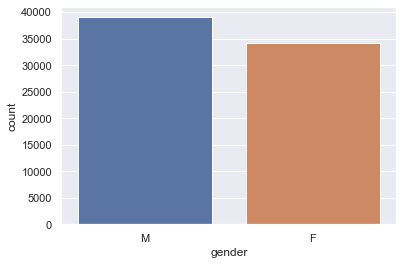

In [33]:
sns.countplot(x = 'gender', data = train1)

* Males were more in number over Females in attempting the test.

### Variable - education

In [34]:
train1['education'].value_counts()

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64

In [35]:
train1['education'].value_counts(normalize = True)

High School Diploma    0.469889
Matriculation          0.357759
Bachelors              0.158325
No Qualification       0.007027
Masters                0.007000
Name: education, dtype: float64

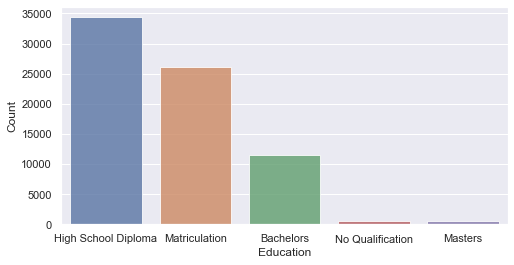

In [36]:
educ_plot = train1['education'].value_counts()
plt.figure(figsize = (8, 4))
sns.barplot(educ_plot.index, educ_plot.values, alpha = 0.8)
plt.xlabel('Education', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

* As seen above, the most number of the people have completed their High School Diploma, and number of people who have either No Qualification or have attained Masters degree are nearly same.

### Variable - city_tier

In [37]:
train1['city_tier'].value_counts()

3    26221
1    23139
2    16300
4     7487
Name: city_tier, dtype: int64

In [38]:
train1['city_tier'].value_counts(normalize = True)

3    0.358470
1    0.316336
2    0.222839
4    0.102356
Name: city_tier, dtype: float64

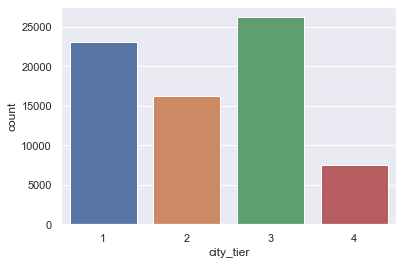

In [39]:
sns.countplot(x = 'city_tier', data = train1)

* As evident, most number of trainees hail from Tier 3 cities and less number of trainees are from Tier 4 cities.

### Variable - is_handicapped

In [40]:
train1['is_handicapped'].value_counts()

N    66577
Y     6570
Name: is_handicapped, dtype: int64

In [41]:
train1['is_handicapped'].value_counts(normalize = True)

N    0.910181
Y    0.089819
Name: is_handicapped, dtype: float64

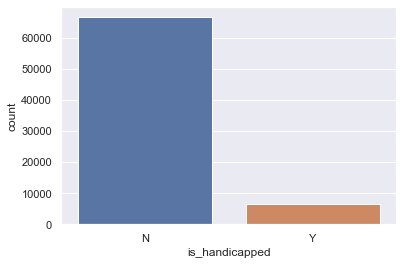

In [42]:
sns.countplot(x = 'is_handicapped', data = train1)

* Most number of trainees are not handicapped.

### Ordinal Variables

In [43]:
ordinal = ['program_type', 'program_duration', 'total_programs_enrolled', 'trainee_engagement_rating']

In [44]:
train1[ordinal].describe(include = 'all')

,program_type,program_duration,total_programs_enrolled,trainee_engagement_rating
count,73147,73147.000000,73147.000000,73070.000000
unique,7,NaN,NaN,NaN
top,Y,NaN,NaN,NaN
freq,22560,NaN,NaN,NaN
mean,NaN,128.208676,2.583934,2.395634
std,NaN,6.889679,1.240816,1.325288
min,NaN,117.000000,1.000000,1.000000
25%,NaN,121.000000,2.000000,1.000000
50%,NaN,131.000000,2.000000,2.000000
75%,NaN,134.000000,3.000000,4.000000


### Data Visualization Of Ordinal Variables 

### Univariate Analysis

### Variable - program_type

In [45]:
train1['program_type'].value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [46]:
train1['program_type'].value_counts(normalize = True)

Y    0.308420
T    0.252341
V    0.178066
U    0.106922
Z    0.090626
X    0.045497
S    0.018128
Name: program_type, dtype: float64

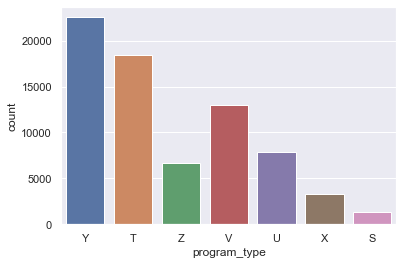

In [47]:
sns.countplot(x = 'program_type', data = train1)

* Most of the trainees have opted for Program - Y, and least number of trainees have opted for Program - S.

### Variable - program_duration

In [48]:
train1['program_duration'].value_counts()

134    13027
120    11130
136     9765
121     7679
122     7374
135     7267
131     6571
117     4266
133     3409
130     2659
Name: program_duration, dtype: int64

In [49]:
train1['program_duration'].value_counts(normalize = True)

134    0.178093
120    0.152159
136    0.133498
121    0.104980
122    0.100811
135    0.099348
131    0.089833
117    0.058321
133    0.046605
130    0.036351
Name: program_duration, dtype: float64

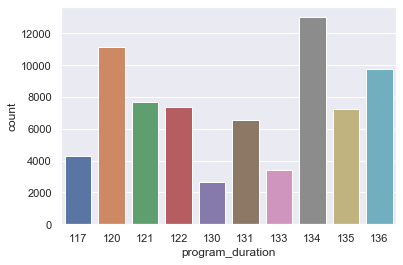

In [50]:
sns.countplot(x = 'program_duration', data = train1)

* Most programs have a duration of 134 days and minimum duration of a program is 117 days.

### Variable - total_programs_enrolled

In [51]:
train1['total_programs_enrolled'].value_counts()

2     40538
4     13521
3      7652
1      7522
5      1705
6      1458
8       300
7       286
9        79
10       30
12       28
11       15
14       13
Name: total_programs_enrolled, dtype: int64

In [52]:
train1['total_programs_enrolled'].value_counts(normalize = True)

2     0.554199
4     0.184847
3     0.104611
1     0.102834
5     0.023309
6     0.019932
8     0.004101
7     0.003910
9     0.001080
10    0.000410
12    0.000383
11    0.000205
14    0.000178
Name: total_programs_enrolled, dtype: float64

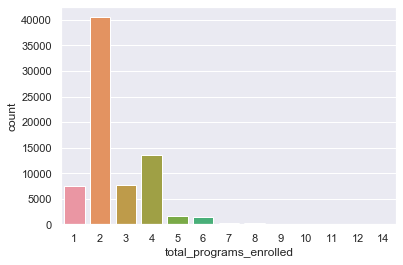

In [53]:
sns.countplot(x = 'total_programs_enrolled', data = train1)

* Most trainees have enrolled for 2 programs, and only a handful of trainees have enrolled for more than 6 training programs

### Variables - trainee_engagement_rating

In [54]:
train1['trainee_engagement_rating'].value_counts()

1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
Name: trainee_engagement_rating, dtype: int64

In [55]:
train1['trainee_engagement_rating'].value_counts(normalize = True)

1.0    0.350281
2.0    0.235856
4.0    0.179458
3.0    0.158109
5.0    0.076297
Name: trainee_engagement_rating, dtype: float64

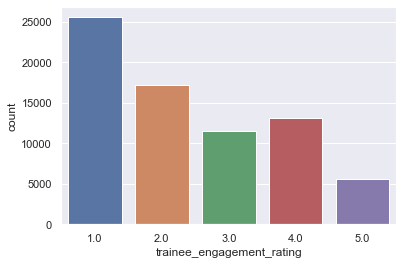

In [56]:
sns.countplot(x = 'trainee_engagement_rating', data = train1)

* Most of the trainees attained a rating of 1 by the trainers which shows a lack of interest among the trainees while undergoing the training sessions.

### Bivariate Analysis

* We shall define a function to compare pass rates for different categories.

In [57]:
def catord_pass(feature):
    catord = train1.groupby(feature)['is_pass'].value_counts(normalize = True).unstack()
    catord.plot(kind = 'bar', stacked = 'True')
    
    bivaplot = train1[feature].value_counts()
    plt.figure(figsize = (8, 4))
    sns.barplot(bivaplot.index, bivaplot.values, alpha = 0.8)
    plt.ylabel('Occurences', fontsize = 12)
    plt.xlabel(str(feature), fontsize = 12)
    plt.show()

### Categorical Features

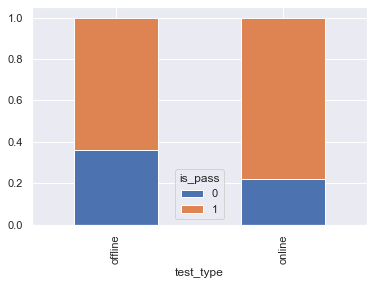

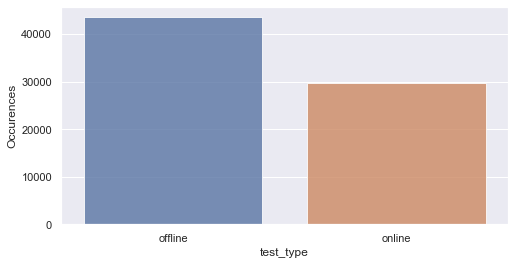

In [58]:
catord_pass("test_type")

* More number of trainees passed the test who have opted for online test(s) over those who have opted for offline test(s).

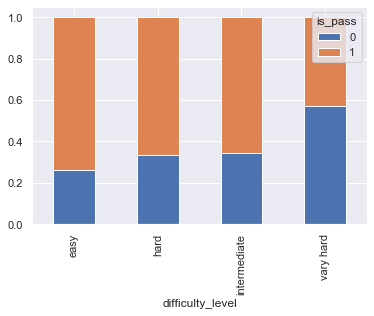

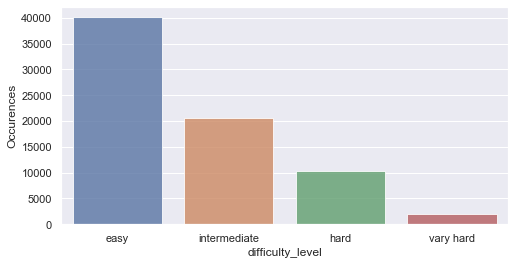

In [59]:
catord_pass('difficulty_level')

* Most of the trainees who have opted for <b>easy</b> type of tests have mostly passed the test.
* The percentage of trainees who have opted for <b>intermediate</b> and <b>hard</b> tests and have passed is nearly same.
* The trainees who have opted for <b>vary hard</b> test have mostly failed.

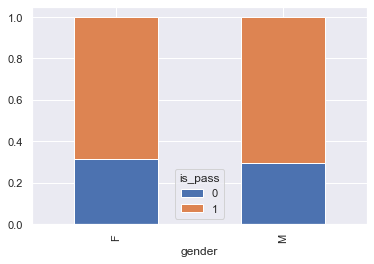

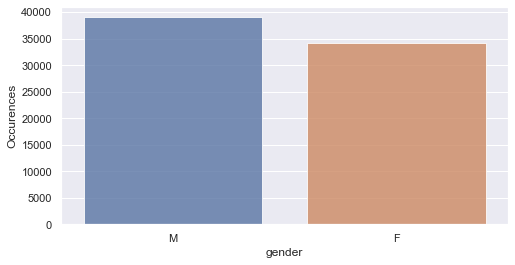

In [60]:
catord_pass('gender')

* The percentage of males and females who have passed is nearly same.

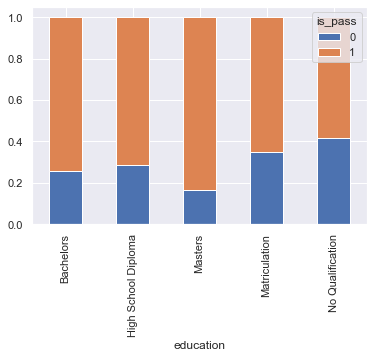

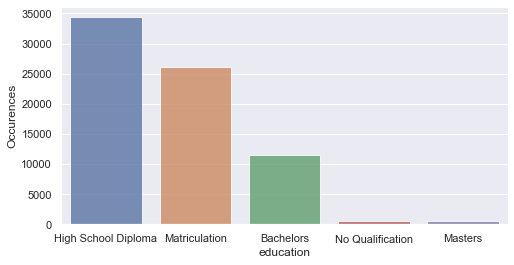

In [61]:
catord_pass('education')

* The percentage of trainees who have passed and have either <b>Bachelors</b> or <b>High School Diploma</b> is nearly same.
* The maximum percentage of trainees who have passed have <b>Masters</b> degree.

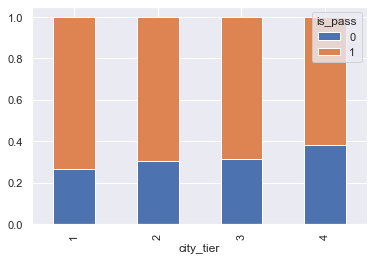

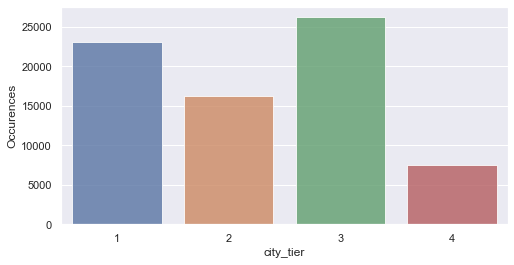

In [62]:
catord_pass('city_tier')

* The maximum percentage of trainees who have passed are from <b>Tier 1</b> cities.
* The percentage of trainees who hail from <b>Tier 2</b> and <b>Tier 3</b> cities and have passed are same.

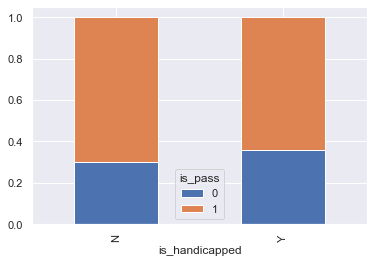

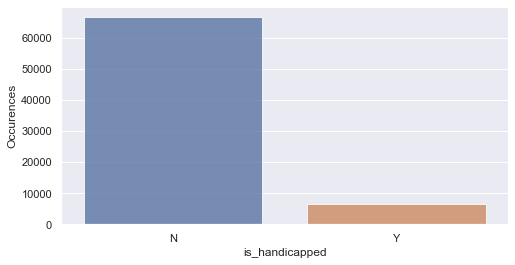

In [63]:
catord_pass('is_handicapped')

* The percentage of trainees who are <b>handicapped</b> and have passed the test are more as compared to those who are <b>not handicapped</b> and have passed the test. 

### Ordinal Features

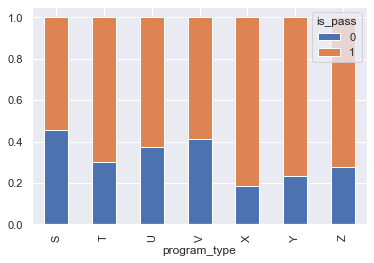

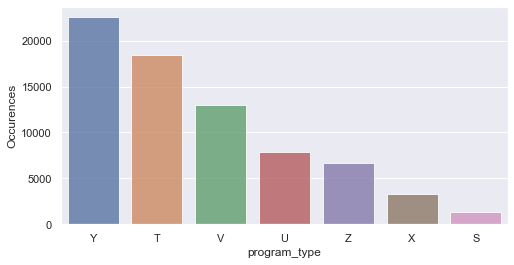

In [64]:
catord_pass('program_type')

* Out of all the programs opted by the trainees, the maximum percentage of trainees have passed who have opted for <b>Program X</b> and the minimum percentage of trainees who have passed have opted for <b>Program S</b>. 

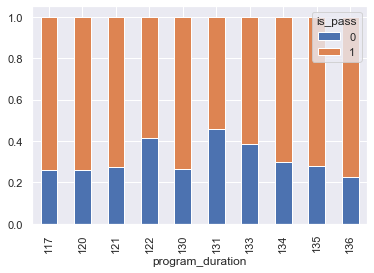

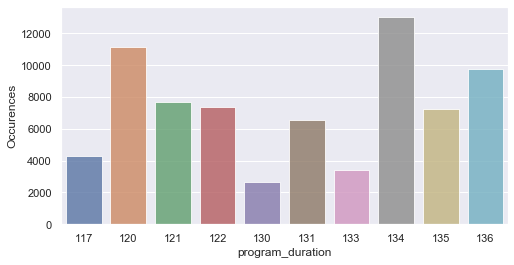

In [65]:
catord_pass('program_duration')

* The maximum percentage of trainees have passed who have opted for program duration of <b>136 Days</b>.
* The minimum percentage of trainees have passed who have opted for program duration of <b>131 Days</b>.
* The percentage of trainees who passed is same for the program durations <b>117, 120, 121, 130 and 135 Days</b>.

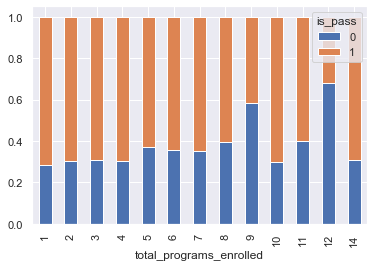

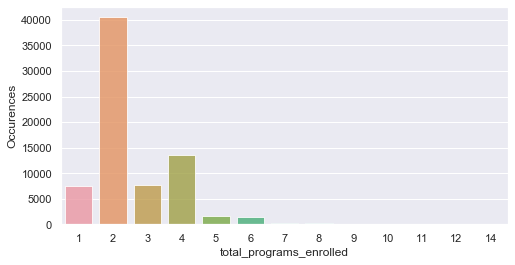

In [66]:
catord_pass('total_programs_enrolled')

* The maximum percentage of people who have passed is same for those trainees who have opted for <b>1, 10 or 14</b> programs.
* The minimum percentage of people who have passed have opted for <b>12</b> programs.
* The percentage of people who have passed is same for those trainees who have opted for <b>2, 3 or 4</b> programs.
* Also, the percentage of people who have passed is same for those trainees who have opted for <b>6 or 7</b> and <b>8 or 11</b> programs.

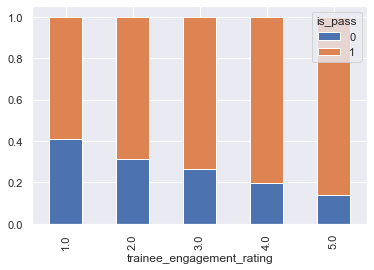

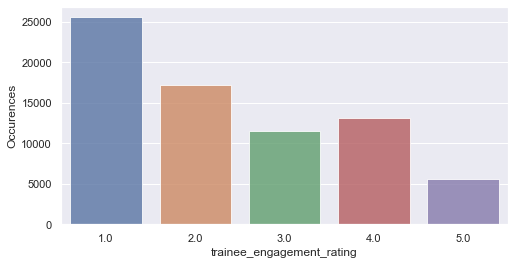

In [67]:
catord_pass('trainee_engagement_rating')

* Maximum percentage of trainees have passed who have been rated <b>5</b> and minimum percentage of trainees who have passed have been rated <b>1</b> by the trainers.

## Feature Engineering

### Missing Value Treatment - age, trainee_engagement_rating

### Variable - trainee_engagement_rating of train dataset

* First let's see the kernel distribution of <b>trainee_engagement_rating</b> variable to anlayse by what value, the missing values of the age variable can be replaced.

* Let's define a function for train dataset, so that we can plot the kdeplots of any variable. We shall plot kdeplot free from null variables.

In [68]:
def kdeplot(feature):
    plt.figure(figsize = (12, 6))
    plt.title("kde plot for {}".format(feature))
    xkde = sns.kdeplot(train1[train1["is_pass"] == 0][feature].dropna(), color = 'red', label = 'is_pass - 0')
    ykde = sns.kdeplot(train1[train1["is_pass"] == 1][feature].dropna(), color = 'green', label = 'is_pass - 1')

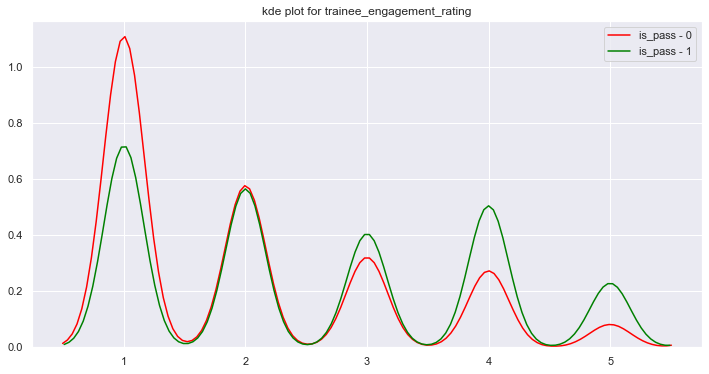

In [69]:
kdeplot('trainee_engagement_rating')

* Let's find out mean, median and mode of <b>trainee_engagement_rating</b> variable.

In [70]:
print("Mean of age variable: ", train1['trainee_engagement_rating'].mean())
print("Median of age variable: ", train1['trainee_engagement_rating'].median())
print("Mode of age variable: ", train1['trainee_engagement_rating'].mode())

Mean of age variable:  2.3956343232516764
Median of age variable:  2.0
Mode of age variable:  0    1.0
dtype: float64


* Let's replace the missing values of <b>trainee_engagement_rating</b> in train dataset by median. Even if we replace the missing values by mean or mode it won't make much difference, because only 31 values are missing.

In [71]:
train1['trainee_engagement_rating'].fillna(train1['trainee_engagement_rating'].median(), inplace = True)

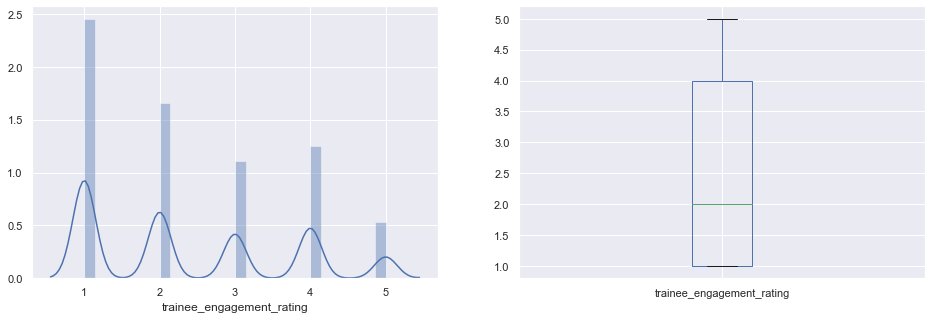

In [72]:
plt.subplot(1,2,1)
sns.distplot(train1['trainee_engagement_rating'])
plt.subplot(1,2,2)
train1['trainee_engagement_rating'].plot.box(figsize = (16, 5))
plt.show()

### Variable - trainee_engagement_rating of test dataset

* Let's replace the missing values of <b>trainee_engagement_rating</b> in test dataset by median. Even if we replace the missing values by mean or mode it won't make much difference, because only 31 values are missing.

In [73]:
print("Mean of age variable: ", test1['trainee_engagement_rating'].mean())
print("Median of age variable: ", test1['trainee_engagement_rating'].median())
print("Mode of age variable: ", test1['trainee_engagement_rating'].mode())

Mean of age variable:  2.402771569065713
Median of age variable:  2.0
Mode of age variable:  0    1.0
dtype: float64


In [74]:
test1['trainee_engagement_rating'].fillna(test1['trainee_engagement_rating'].median(), inplace = True)

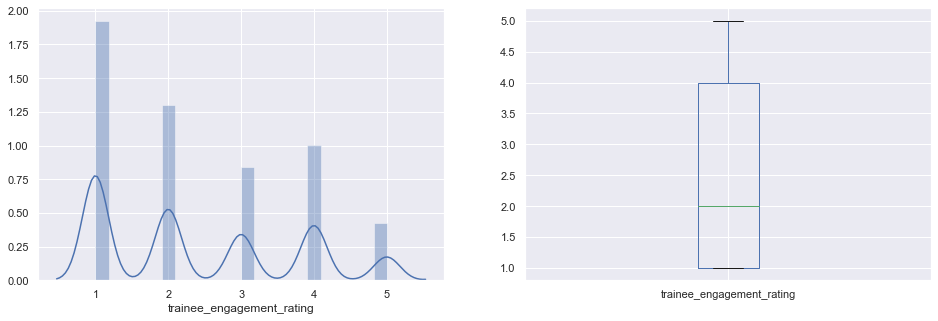

In [75]:
plt.subplot(1,2,1)
sns.distplot(test1['trainee_engagement_rating'])
plt.subplot(1,2,2)
test1['trainee_engagement_rating'].plot.box(figsize = (16, 5))
plt.show()

### Variable - age of train dataset

* As we know that age is a continuous variable, first let's see the kernel distribution of age variable to anlayse by what value, the missing values of the age variable can be replaced.

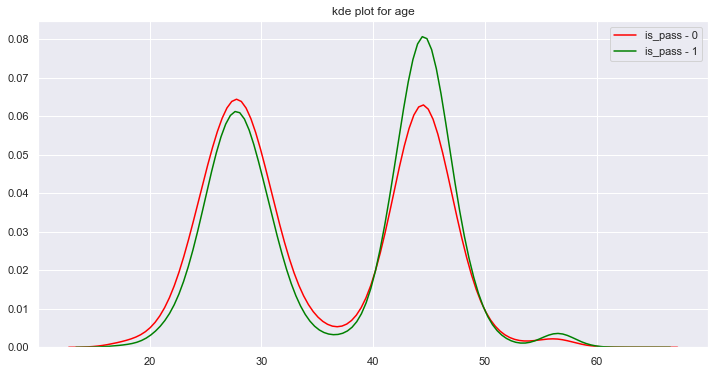

In [76]:
kdeplot('age')

* Let's find out mean, median and mode of <b>age</b> variable.

In [77]:
print("Mean of age variable: ", train1['age'].mean())
print("Median of age variable: ", train1['age'].median())
print("Mode of age variable: ", train1['age'].mode())

Mean of age variable:  36.494033202694965
Median of age variable:  39.0
Mode of age variable:  0    45.0
dtype: float64


* We shall choose the variables <b>gender</b>, <b>city_tier</b>, <b>total_programs_enrolled</b> and <b>trainee_engagement_rating</b> variables  to know about the age to fill the missing values. This is because, we can avoid biasing and skewness.

* We shall refer to those variables, where age is distributed maximally to avoid biasing and skewness. If inspite of this, the distribution of <b>age</b> is not normal, we shall replace the missing values by either Mean, Median or Mode.

* After experimenting, it was found that the best way to replace the missing values of <b>age</b> variable is by replacing them with median age of each trainee_engagement_rating.

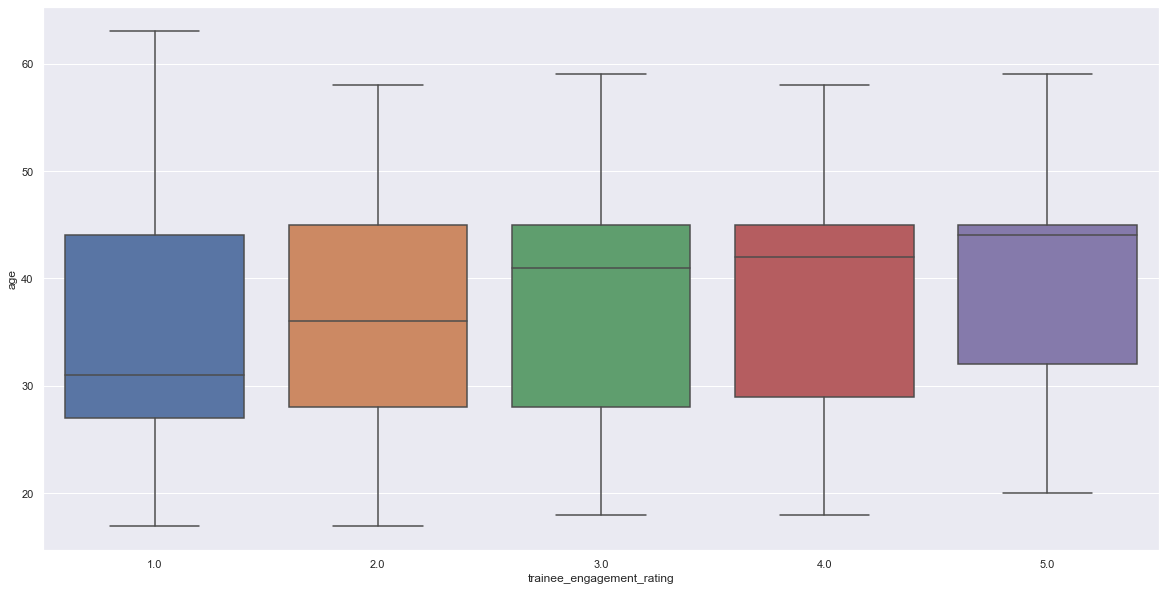

In [78]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'trainee_engagement_rating', y = 'age', data = train1)

* We define a function to replace the null values of <b>age</b> variable.

In [79]:
def impute_age(cols):
    age = cols[0]
    trainee_engagement_rating = cols[1]
    
    if pd.isnull(age):
        if trainee_engagement_rating == 1.0:
            return 35
        elif trainee_engagement_rating == 2.0:
            return 41
        elif trainee_engagement_rating == 3.0:
            return 35
        elif trainee_engagement_rating == 4.0:
            return 31
        else:
            return 44
        
    else:
        return age

* Let's apply the impute_age function ontrain dataset

In [80]:
train1['age'] = train1[['age', 'trainee_engagement_rating']].apply(impute_age, axis = 1)

* Let's plot the distribution plot of age variable now.

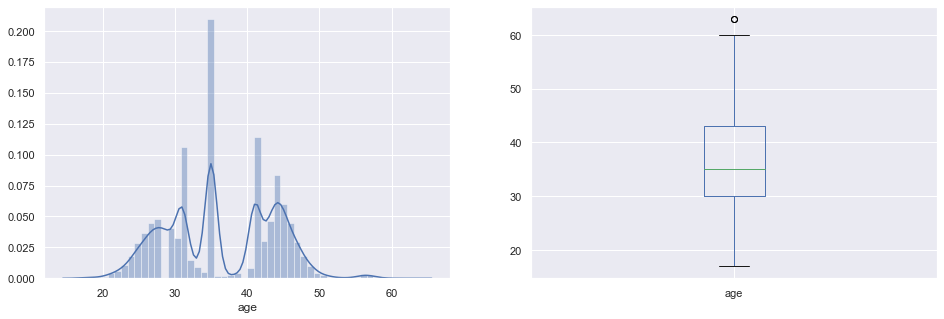

In [81]:
plt.subplot(1,2,1)
sns.distplot(train1['age'])
plt.subplot(1,2,2)
train1['age'].plot.box(figsize = (16, 5))
plt.show()

### Variable - age of test dataset

* Let's replace the missing values of <b>age</b> in test dataset by replacing them with median age of each trainee_engagement_rating.

* Let's apply the impute_age function ontrain dataset

In [82]:
test1['age'] = test1[['age', 'trainee_engagement_rating']].apply(impute_age, axis = 1)

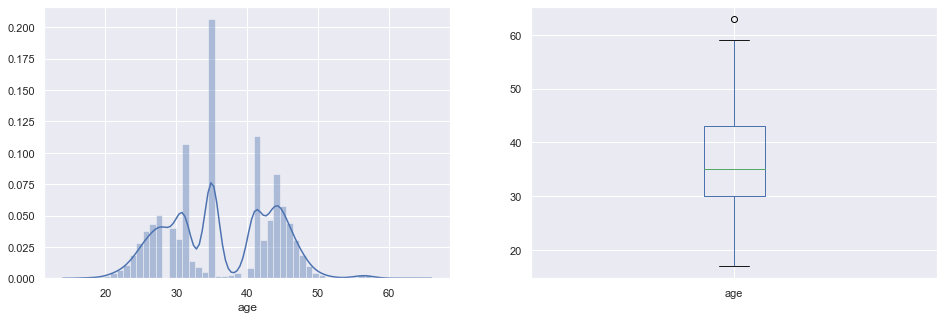

In [83]:
plt.subplot(1,2,1)
sns.distplot(test1['age'])
plt.subplot(1,2,2)
test1['age'].plot.box(figsize = (16, 5))
plt.show()

### Outlier Treatment

### Variable - age of train dataset

In [84]:
train1['age'].quantile([0.25, 0.5, 0.75, 0.99])

0.25    30.0
0.50    35.0
0.75    43.0
0.99    51.0
Name: age, dtype: float64

In [85]:
age_lower1 = np.percentile(train1['age'], 1)
print(age_lower1)

22.0


In [86]:
age_higher1 = np.percentile(train1['age'], 99.7)
print(age_higher1)

57.0


In [87]:
(train1['age'] > age_higher1).value_counts() 

False    73064
True        83
Name: age, dtype: int64

In [88]:
train1['age'] = np.where(train1['age'] > age_higher1, age_higher1, train1['age'])

### Variable - age of test dataset

In [89]:
test1['age'].quantile([0.25, 0.50, 0.75, 0.99])

0.25    30.0
0.50    35.0
0.75    43.0
0.99    51.0
Name: age, dtype: float64

In [90]:
age_lower2 = np.percentile(test1['age'], 1)
print(age_lower2)

22.0


In [91]:
age_higher2 = np.mean(test1['age']) + 3 * (np.std(test1['age']))
print(age_higher2)

59.01503416076089


In [92]:
(test1['age'] > age_higher2).value_counts()

False    31348
True         1
Name: age, dtype: int64

In [93]:
test1['age']  = np.where(test1['age'] > age_higher2, age_higher2, test1['age'])

* We can categorize <b>age</b> variable by binning the trainees into different age groups.

In [94]:
print("Minimum Age(train1): ", train1['age'].min())
print("Maximum Age(train1): ", train1['age'].max())

Minimum Age(train1):  17.0
Maximum Age(train1):  57.0


In [95]:
print("Minimum Age(test1): ", test1['age'].min())
print("Maximum Age(test1): ", test1['age'].max())

Minimum Age(test1):  17.0
Maximum Age(test1):  59.01503416076089


In [96]:
bins = [0, 18, 25, 35, 55, 75]

In [97]:
names = ['Teen', 'Young', 'Adult', 'Mid Adult', 'Old']

In [98]:
train1['age_group'] = pd.cut(train1['age'], bins, labels = names, right = False)
test1['age_group'] = pd.cut(test1['age'], bins, labels = names, right = False)

In [99]:
train1.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
age_group                    0
dtype: int64

In [100]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         73147 non-null  object  
 1   program_id                 73147 non-null  object  
 2   program_type               73147 non-null  object  
 3   program_duration           73147 non-null  int64   
 4   test_id                    73147 non-null  int64   
 5   test_type                  73147 non-null  object  
 6   difficulty_level           73147 non-null  object  
 7   trainee_id                 73147 non-null  int64   
 8   gender                     73147 non-null  object  
 9   education                  73147 non-null  object  
 10  city_tier                  73147 non-null  int64   
 11  age                        73147 non-null  float64 
 12  total_programs_enrolled    73147 non-null  int64   
 13  is_handicapped             7314

In [101]:
test1.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
age_group                    0
dtype: int64

In [102]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         31349 non-null  object  
 1   program_id                 31349 non-null  object  
 2   program_type               31349 non-null  object  
 3   program_duration           31349 non-null  int64   
 4   test_id                    31349 non-null  int64   
 5   test_type                  31349 non-null  object  
 6   difficulty_level           31349 non-null  object  
 7   trainee_id                 31349 non-null  int64   
 8   gender                     31349 non-null  object  
 9   education                  31349 non-null  object  
 10  city_tier                  31349 non-null  int64   
 11  age                        31349 non-null  float64 
 12  total_programs_enrolled    31349 non-null  int64   
 13  is_handicapped             3134

* As the categorical and ordinal data have variables of type <b>object</b> let's do the feature engineering, by following binning approach. 

### Variable Transformation(Categorical Variables) - test_type, difficulty_level, gender, education, city_tier, is_handicapped

### Variable - test_type 

* We shall follow the binning approach by assigning a numeric value to different <b>test_type</b> variable values and map the same into the original variable.

In [103]:
print(train1['test_type'].value_counts())

offline    43543
online     29604
Name: test_type, dtype: int64


In [104]:
print(test1['test_type'].value_counts())

offline    18713
online     12636
Name: test_type, dtype: int64


* <b>Bin Creation</b>

In [105]:
test_type_bins = {"offline":0, "online":1}
train1['test_type'] = train1['test_type'].map(test_type_bins)
test1['test_type'] = test1['test_type'].map(test_type_bins)

### Variable - difficulty_level

* We shall again follow the binning approach by assigning a numeric value to different <b>difficulty_level</b> variable values and map the same into the original variable.

In [106]:
print(train1['difficulty_level'].value_counts())

easy            40101
intermediate    20668
hard            10297
vary hard        2081
Name: difficulty_level, dtype: int64


In [107]:
print(test1['difficulty_level'].value_counts())

easy            17110
intermediate     8869
hard             4480
vary hard         890
Name: difficulty_level, dtype: int64


* <b>Bin Creation</b>

In [108]:
difficulty_level_bins = {"easy":0, "intermediate":1, "hard":2, "vary hard":3}
train1['difficulty_level'] = train1['difficulty_level'].map(difficulty_level_bins)
test1['difficulty_level'] = test1['difficulty_level'].map(difficulty_level_bins)

### Variable - gender

* We shall follow the binning approach by assigning a numeric value to different <b>gender</b> variable values and map the same into the original variable.

In [109]:
print(train1['gender'].value_counts())

M    39043
F    34104
Name: gender, dtype: int64


In [110]:
print(test1['gender'].value_counts())

M    16830
F    14519
Name: gender, dtype: int64


* <b>Bin Creation</b>

In [111]:
gender_bins = {"M":0, "F":1}
train1['gender'] = train1['gender'].map(gender_bins)
test1['gender'] = test1['gender'].map(gender_bins)

### Variable - education

* We shall follow the binning approach by assigning a numeric value to different <b>education</b> variable values and map the same into the original variable.

In [112]:
print(train1['education'].value_counts())

High School Diploma    34371
Matriculation          26169
Bachelors              11581
No Qualification         514
Masters                  512
Name: education, dtype: int64


In [113]:
print(test1['education'].value_counts())

High School Diploma    14612
Matriculation          11263
Bachelors               5009
Masters                  242
No Qualification         223
Name: education, dtype: int64


* <b>Bin Creation</b>

In [114]:
education_bins = {"High School Diploma":2, "Matriculation":1, "Bachelors":3, "Masters":4, "No Qualification":0}
train1['education'] = train['education'].map(education_bins)
test1['education'] = test1['education'].map(education_bins)

### Variable - city_tier

* We shall not follow the binning approach for <b>city_tier</b> as they are already binned.

In [115]:
print(train1['city_tier'].value_counts())

3    26221
1    23139
2    16300
4     7487
Name: city_tier, dtype: int64


In [116]:
print(test1['city_tier'].value_counts())

3    11359
1     9886
2     6886
4     3218
Name: city_tier, dtype: int64


### Variable - is_handicapped

* We shall follow the binning approach by assigning a numeric value to different <b>is_handicapped</b> variable values and map the same into the original variable.

In [117]:
print(train1['is_handicapped'].value_counts())

N    66577
Y     6570
Name: is_handicapped, dtype: int64


In [118]:
print(test1['is_handicapped'].value_counts())

N    28670
Y     2679
Name: is_handicapped, dtype: int64


* <b>Bin Creation</b>

In [119]:
is_handicapped_bins = {"N":0, "Y":1}
train1['is_handicapped'] = train1['is_handicapped'].map(is_handicapped_bins)
test1['is_handicapped'] = test['is_handicapped'].map(is_handicapped_bins)

* As the ordinal data has variables of type <b>object</b> let's do the feature engineering, by following binning approach. 

### Variable Transformation(Ordinal Variables) - program_type, program_duration, total_programs_enrolled, age_group

### Variable - program_type

* We shall follow the binning approach by assigning a numeric value to different <b>program_type</b> variable values and map the same into the original variable.

In [120]:
print(train1['program_type'].value_counts())

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64


In [121]:
print(train1['program_type'].value_counts())

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64


* <b>Bin Creation</b>

In [122]:
program_type_bins = {"S":0, "X":1, "Z":2, "U":3, "V":4, "T":5, "Y":6}
train1['program_type'] = train1['program_type'].map(program_type_bins)
test1['program_type'] = test['program_type'].map(program_type_bins)

### Variable - program_duration

In [123]:
print(train1['program_duration'].value_counts())

134    13027
120    11130
136     9765
121     7679
122     7374
135     7267
131     6571
117     4266
133     3409
130     2659
Name: program_duration, dtype: int64


In [124]:
print(test1['program_duration'].value_counts())

134    5608
120    4783
136    4123
121    3298
135    3268
122    3206
131    2809
117    1814
133    1447
130     993
Name: program_duration, dtype: int64


### Variable - total_programs_enrolled

In [125]:
print(train1['total_programs_enrolled'].value_counts())

2     40538
4     13521
3      7652
1      7522
5      1705
6      1458
8       300
7       286
9        79
10       30
12       28
11       15
14       13
Name: total_programs_enrolled, dtype: int64


In [126]:
print(test1['total_programs_enrolled'].value_counts())

2     17318
4      5870
3      3378
1      3130
5       704
6       624
7       142
8       120
9        31
10       11
11        8
12        7
14        6
Name: total_programs_enrolled, dtype: int64


### Variable - age_group

In [127]:
print(train1['age_group'].value_counts())

Mid Adult    45274
Adult        24474
Young         2802
Old            562
Teen            35
Name: age_group, dtype: int64


In [128]:
print(test1['age_group'].value_counts())

Mid Adult    19317
Adult        10536
Young         1257
Old            227
Teen            12
Name: age_group, dtype: int64


* Bin Creation

In [129]:
age_group_bins = {"Teen":0, "Young":1, "Adult":2, "Mid Adult":3, "Old":4}
train1['age_group'] = train1['age_group'].map(age_group_bins)
test1['age_group'] = test1['age_group'].map(age_group_bins)

### Variable Type Conversion - age, age_group, trainee_engagement_rating

### Variable - age

In [130]:
train1['age'] = train1.age.astype(int)

In [131]:
test1['age'] = test1.age.astype(int)

### Variable - age_group

In [132]:
train1['age_group'] = train1.age_group.astype(int)

In [133]:
test1['age_group'] = test1.age_group.astype(int)

### Variable - trainee_engagement_rating

In [134]:
train1['trainee_engagement_rating'] = train1.age.astype(int)

In [135]:
test1['trainee_engagement_rating'] = test1.age.astype(int)

In [136]:
train1.dtypes

id                           object
program_id                   object
program_type                  int64
program_duration              int64
test_id                       int64
test_type                     int64
difficulty_level              int64
trainee_id                    int64
gender                        int64
education                     int64
city_tier                     int64
age                           int32
total_programs_enrolled       int64
is_handicapped                int64
trainee_engagement_rating     int32
is_pass                       int64
age_group                     int32
dtype: object

In [137]:
test1.dtypes

id                           object
program_id                   object
program_type                  int64
program_duration              int64
test_id                       int64
test_type                     int64
difficulty_level              int64
trainee_id                    int64
gender                        int64
education                     int64
city_tier                     int64
age                           int32
total_programs_enrolled       int64
is_handicapped                int64
trainee_engagement_rating     int32
age_group                     int32
dtype: object

### Variable Dropping - id, program_id, test_id, trainee_id, 

In [138]:
var_drop = ['id', 'age', 'program_id', 'test_id', 'trainee_id']
train1 = train1.drop(var_drop, axis = 1)
test1 = test1.drop(var_drop, axis = 1)

In [139]:
train1.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,age_group
0,6,136,0,1,0,1,3,5,0,24,0,1
1,5,131,0,0,1,2,4,2,0,26,1,2
2,2,120,1,0,0,1,1,1,0,40,1,3
3,5,117,0,0,1,1,3,4,0,35,1,3
4,4,131,0,1,1,2,1,2,0,42,1,3


In [140]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   program_type               73147 non-null  int64
 1   program_duration           73147 non-null  int64
 2   test_type                  73147 non-null  int64
 3   difficulty_level           73147 non-null  int64
 4   gender                     73147 non-null  int64
 5   education                  73147 non-null  int64
 6   city_tier                  73147 non-null  int64
 7   total_programs_enrolled    73147 non-null  int64
 8   is_handicapped             73147 non-null  int64
 9   trainee_engagement_rating  73147 non-null  int32
 10  is_pass                    73147 non-null  int64
 11  age_group                  73147 non-null  int32
dtypes: int32(2), int64(10)
memory usage: 6.1 MB


In [141]:
test1.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,age_group
0,5,131,0,1,1,1,3,2,0,46,3
1,6,135,1,0,0,3,3,4,0,31,2
2,6,120,1,0,0,1,3,2,0,35,3
3,4,122,0,3,1,2,1,2,0,41,3
4,4,122,0,1,1,1,3,2,0,41,3


In [142]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   program_type               31349 non-null  int64
 1   program_duration           31349 non-null  int64
 2   test_type                  31349 non-null  int64
 3   difficulty_level           31349 non-null  int64
 4   gender                     31349 non-null  int64
 5   education                  31349 non-null  int64
 6   city_tier                  31349 non-null  int64
 7   total_programs_enrolled    31349 non-null  int64
 8   is_handicapped             31349 non-null  int64
 9   trainee_engagement_rating  31349 non-null  int32
 10  age_group                  31349 non-null  int32
dtypes: int32(2), int64(9)
memory usage: 2.4 MB


## Corelation Heatmap of all variables

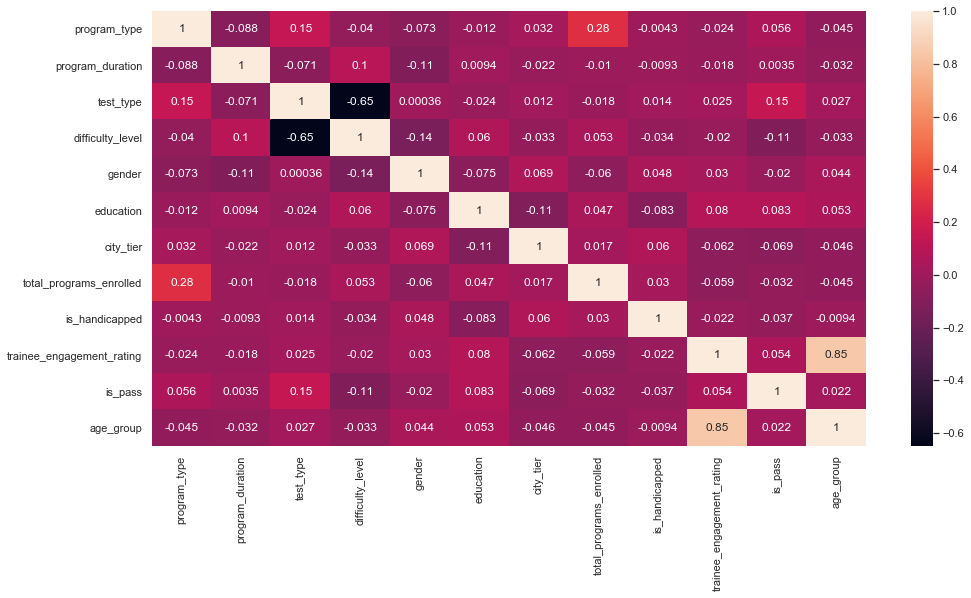

In [143]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(train1.corr(), annot = True)

* There is direct corelation between age_group and trainee_engagement_rating.
* The lowest corelation is between test_type and difficulty_level.

### Conclusion

#### Average Trainee Profile conclusion

* Prefers offline mode of test over online mode
* Most of the tests attempted are easy.
* An average trainee is a Male.
* An average trainee is a High School Diploma holder.
* An average trainee is from a Tier 3 city.
* An average trainee is not handicapped.
* An average trainee atleast enrols for Program Y.
* An average program has a duration of 134 days.
* An average trainee has enrolled for atleast 2 programs.
* An average trainee attains a trainee engagement rating of 1.

#### is_pass conclusion

* 70% of the trainees have passed the training program.
* The trainee engagement rating attained by an average trainee is 1, which shows that trainees are not serious about the programs.
* Although most of the training programs attended by trainees are of offline mode, the tests are mostly easy which makes it easier for trainees to pass them without showing engaging participation during program curriculum.

## Model Selection Metrics

### Data Segregation - Dependent and Independent Variables

In [144]:
y = train1['is_pass']
x = train1.drop('is_pass', axis = 1)

### Splitting the train1 data set into train and test datasets

In [145]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 50)

### Feature Scaling before applying any Machine Learning algorithm

In [146]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## KNN Regression

In [147]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting train data with KNN Regression

In [148]:
y_pred_train_knn = knn.predict(x_test)
y_pred_train_knn

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [149]:
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.6838191064690764


### Confusion Matrix Of KNN

In [150]:
cm = confusion_matrix(y_test, y_pred_train_knn)

In [151]:
print('Confusion Matrix: ', cm)

Confusion Matrix:  [[ 1918  3618]
 [ 2164 10587]]


#### Model Metrics Evaluation

In [152]:
accuracy = accuracy_score(y_pred_train_knn, y_test)
f1 = f1_score(y_pred_train_knn, y_test)
precision = precision_score(y_pred_train_knn, y_test)
recall = recall_score(y_pred_train_knn, y_test)
roc_auc = roc_auc_score(y_pred_train_knn, y_test)
cm = confusion_matrix(y_pred_train_knn, y_test)
mse = mean_squared_error(y_pred_train_knn, y_test)
r_squared = r2_score(y_pred_train_knn, y_test)
rmse = sqrt(mse)

In [153]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)
print('Confusion Matrix: ',cm)
print('Mean Square error:',mse)
print('R Squared value:',r_squared)
print('Root Mean Square error:',rmse)

Accuracy is  : 0.6838191064690764
F1 score is : 0.7855023000445169
Precision is  : 0.8302878205630931
Recall is  : 0.7453009503695882
Roc Auc is  : 0.6075843311377583
Confusion Matrix:  [[ 1918  2164]
 [ 3618 10587]]
Mean Square error: 0.3161808935309236
R Squared value: -0.8235022931005549
Root Mean Square error: 0.5622996474575843


## KFoldCV for hyperparameter tuning

#### Searching for optimal value of K for KNN

In [154]:
k_range = list(range(1, 101))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.679275715577257, 0.6264642196886056, 0.6969252555656424, 0.6678603119028834, 0.6997140849737887, 0.6844572090977686, 0.7042939476366358, 0.6942184026701103, 0.7069188128050008, 0.6994680563740621, 0.706905187123226, 0.7013683810540595, 0.7078759057386923, 0.7026124319673822, 0.7077254998933682, 0.7048681215306145, 0.706850594679704, 0.7039932667824382, 0.7065633881108171, 0.7047997968670651, 0.7066591529162232, 0.7054560295137127, 0.7067137958252332, 0.7047998361180002, 0.705538032193617, 0.7059345806532888, 0.7057705266970842, 0.7061532737803192, 0.7068778684723591, 0.7057294963862037, 0.7063858019274453, 0.7067412023234312, 0.7057295206844018, 0.7067138388143526, 0.7070146374213555, 0.7063447379729061, 0.7064678027382574, 0.7064951569018751, 0.7064405009092198, 0.7065088274418614, 0.7059756352623673, 0.7054698290210575, 0.7053330787629825, 0.7053330451193238, 0.7051553692195288, 0.7061259794276504, 0.7056612203190503, 0.7050323698724027, 0.7053467698629825, 0.7053057283375491, 0.7

#### Plotting the value of K for KNN (x-axis) v/s Cross Validated Accuracy

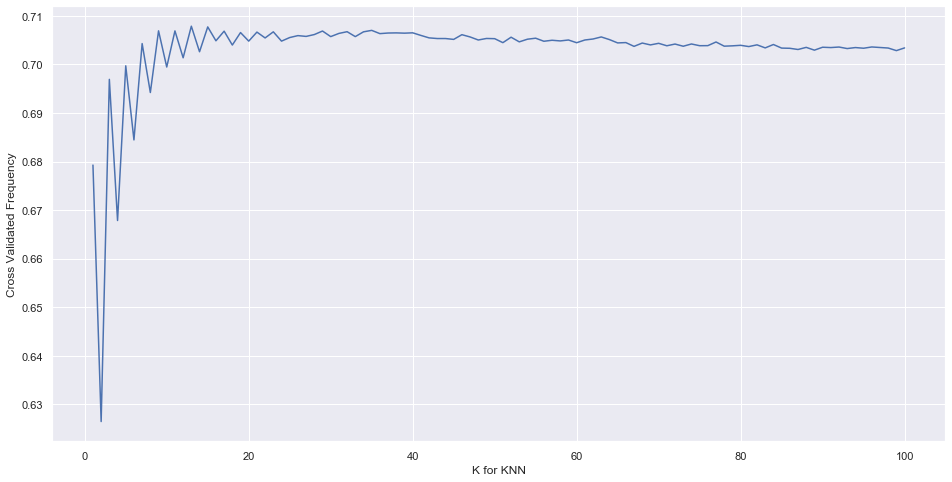

In [155]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross Validated Frequency')
plt.show()

#### Plotting the value of K for KNN v/s Misclassification Error

In [156]:
MSE = [1-x for x in k_scores]
optimal_k_index = MSE.index(min(MSE))
optimal_k = k_range[optimal_k_index]
print(optimal_k)

13


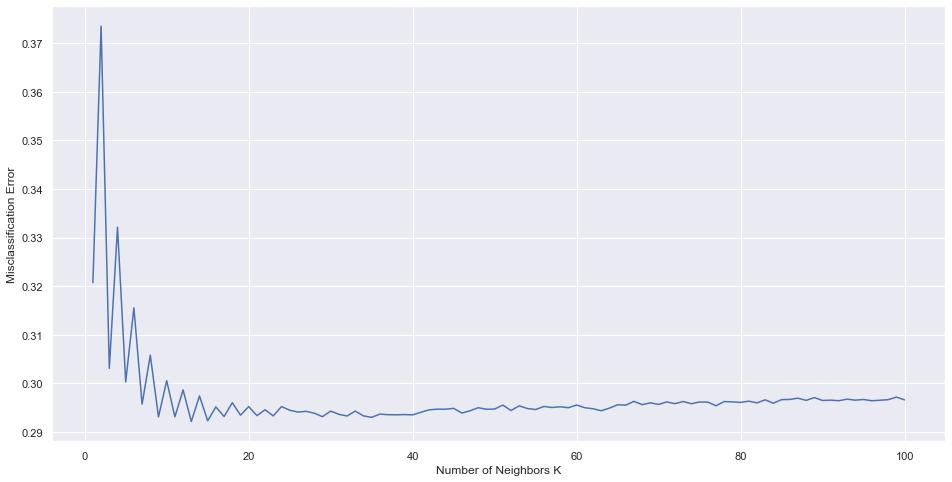

In [157]:
plt.plot(k_range, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

* As evident, for K = 13, the accuracy is maximum and the error is also least. So, we shall train and predict the model for this value

In [158]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [159]:
y_pred_train_knn = knn.predict(x_test)
y_pred_train_knn

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [160]:
accuracy = accuracy_score(y_pred_train_knn, y_test)
f1 = f1_score(y_pred_train_knn, y_test)
precision = precision_score(y_pred_train_knn, y_test)
recall = recall_score(y_pred_train_knn, y_test)
roc_auc = roc_auc_score(y_pred_train_knn, y_test)
cm = confusion_matrix(y_pred_train_knn, y_test)
mse = mean_squared_error(y_pred_train_knn, y_test)
r_squared = r2_score(y_pred_train_knn, y_test)
rmse = sqrt(mse)

In [161]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)
print('Confusion Matrix: ',cm)
print('Mean Square error:',mse)
print('R Squared value:',r_squared)
print('Root Mean Square error:',rmse)

Accuracy is  : 0.6986930606441735
F1 score is : 0.8039006334970461
Precision is  : 0.8857344521998275
Recall is  : 0.7359092982341826
Roc Auc is  : 0.6201655334708328
Confusion Matrix:  [[ 1483  1457]
 [ 4053 11294]]
Mean Square error: 0.30130693935582653
R Squared value: -1.233177482891247
Root Mean Square error: 0.5489143278835291
